In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as stats

In [19]:

df = sns.load_dataset('titanic')
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [20]:
sex = df["sex"]

sex.head()

0      male
1    female
2    female
3    female
4      male
Name: sex, dtype: object

In [21]:
fare = df["fare"]
fare = fare.mode()

# fare
float(fare.iloc[0])

8.05

In [22]:
df['deck'].value_counts()

deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64

In [23]:
# filtered = df.drop(df["deck"]=="NaN")
filtered = df.dropna(subset=["deck"])

filtered.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False


In [24]:
# dirt = df[df["deck"] == "NaN"]
dirt =  df[df["deck"] != "NaN"]
dirt.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [25]:
df["deck"].isna().sum()


np.int64(688)

<Axes: xlabel='fare', ylabel='Count'>

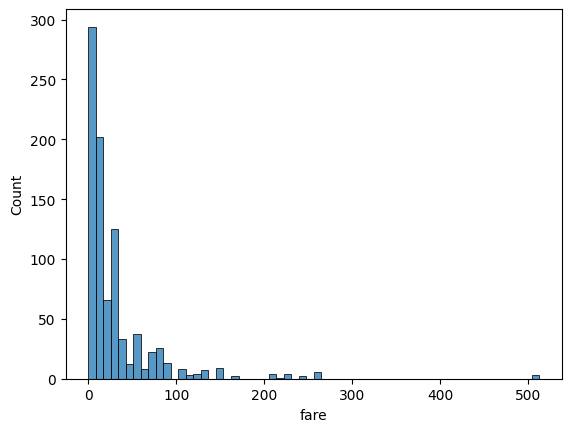

In [26]:
sns.histplot(df,x="fare")

In [27]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [28]:
# Lets find range of a data
# df = np.array([10, 20, 30, 40, 50])
fare = df["fare"]

max_fare = fare.max() # maximum value


np.ptp(fare)  # range (max - min)


np.float64(512.3292)

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generating a dataset with potential outliers
np.random.seed(0)
data = np.random.normal(100, 20, 200)
data = np.append(data, [300, 5])  # Adding potential outliers



In [33]:
Q1 = np.percentile(data,25)

Q3 = np.percentile(data,75)

IQR = Q3 - Q1



In [34]:
# Defining the outlier criteria (1.5 times the IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [35]:
outliers = (data < lower_bound) | (data > upper_bound)

outliers

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [36]:
# Removing outliers
data_no_outliers = data[~outliers]


Text(0.5, 1.0, 'Original Data with Outliers')

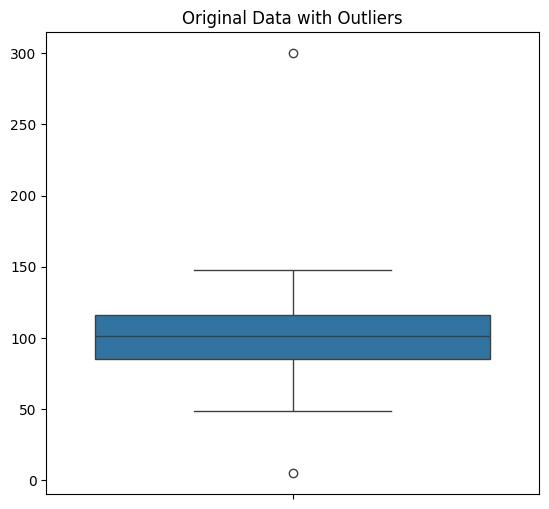

In [37]:
# Plotting the original data with outliers
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=data)
plt.title('Original Data with Outliers')

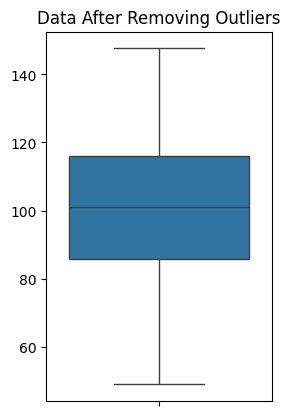

In [38]:
# Plotting the data after removing outliers
plt.subplot(1, 2, 2)
sns.boxplot(data=data_no_outliers)
plt.title('Data After Removing Outliers')

plt.show()

In [39]:
# import library

import numpy as np

# create a dataset

df = np.array([2,3,4,5,6])
mean = np.mean(df)
var = np.var(df, ddof=1)
var

np.float64(2.5)

In [40]:
# import library
import numpy as np

df = np.array([2,3,4,5,6])

#calculate standard deviation
std = np.std(df, ddof=1)
std
print("Standard Deviation: ", std)
# calculate the standard error
se = std/np.sqrt(len(df))
print("Standard Error: ", se)

Standard Deviation:  1.5811388300841898
Standard Error:  0.7071067811865476


In [41]:
# load the data from seaborn
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='total_bill', ylabel='Count'>

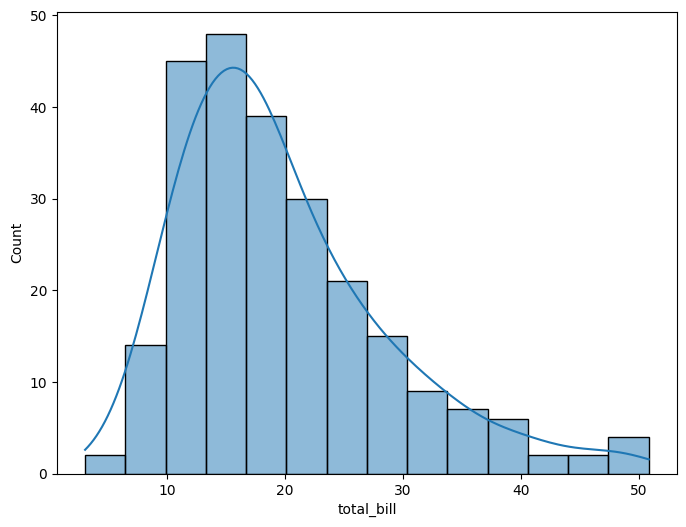

In [42]:
# draw a histplot curve on it
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='total_bill', kde=True)

In [43]:
# load titanic data
df_01 = sns.load_dataset('titanic')
df_01.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='age', ylabel='Count'>

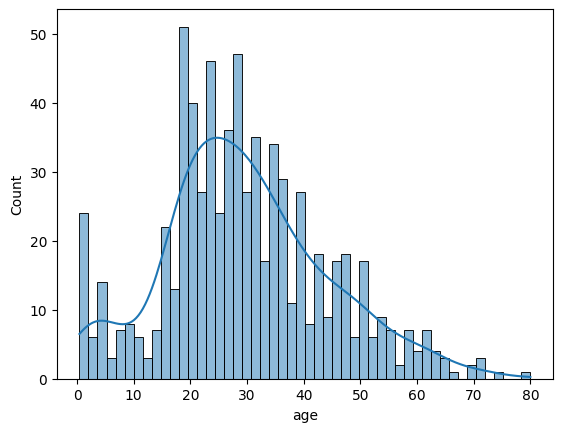

In [44]:
sns.histplot(data= df_01, x = 'age', kde=True, bins=50)

In [45]:
df_01

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


<Axes: xlabel='age', ylabel='Count'>

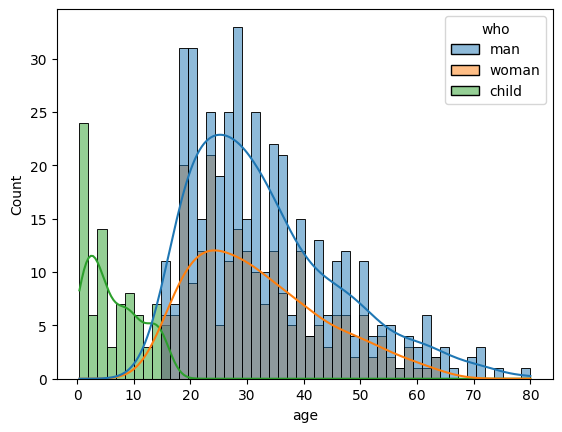

In [46]:
sns.histplot(data= df_01, x = 'age', kde=True, bins=50, hue='who')

<Axes: xlabel='pclass'>

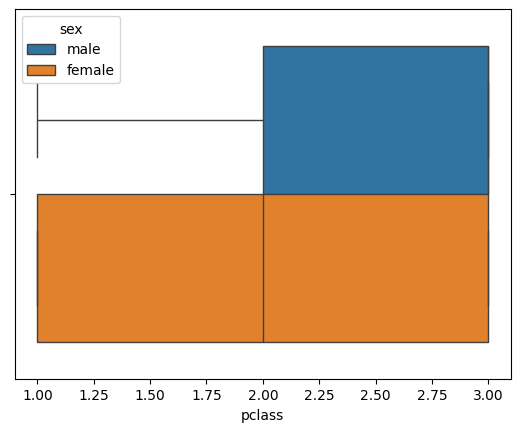

In [47]:
sns.boxplot(data=df_01,x="pclass",hue="sex")

In [48]:
import numpy as np
import matplotlib.pyplot as plt

In [49]:
# Generating example datasets with different distributions
np.random.seed(0)  # For reproducibility
np.random.rand(3)  # above line preserves the random values so that it wount change everytime


# Normal distribution data
normal_data = np.random.normal(loc=0, scale=1, size=1000)

# Uniform distribution data
uniform_data = np.random.uniform(low=-2, high=2, size=1000)

# Exponential distribution data
exponential_data = np.random.exponential(scale=1, size=1000)




Text(0, 0.5, 'Frequency')

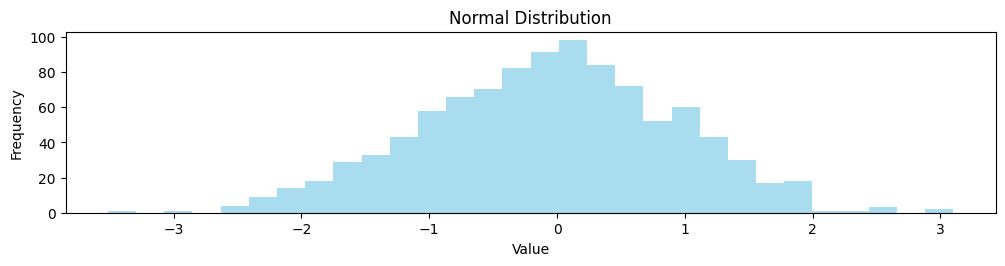

In [50]:
# Plotting the distributions
plt.figure(figsize=(12, 8))

# Normal Distribution Plot
plt.subplot(3, 1, 1)
plt.hist(normal_data, bins=30, color='skyblue', alpha=0.7)
plt.title('Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

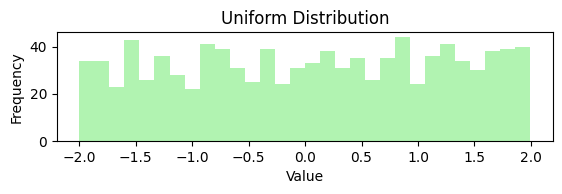

In [51]:
# Uniform Distribution Plot
plt.subplot(3, 1, 2)
plt.hist(uniform_data, bins=30, color='lightgreen', alpha=0.7)
plt.title('Uniform Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

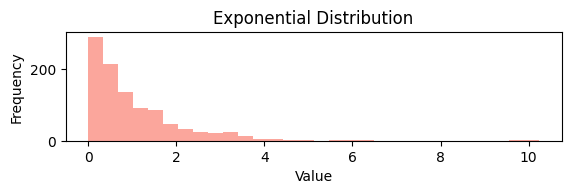

In [52]:
# Exponential Distribution Plot
plt.subplot(3, 1, 3)
plt.hist(exponential_data, bins=30, color='salmon', alpha=0.7)
plt.title('Exponential Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

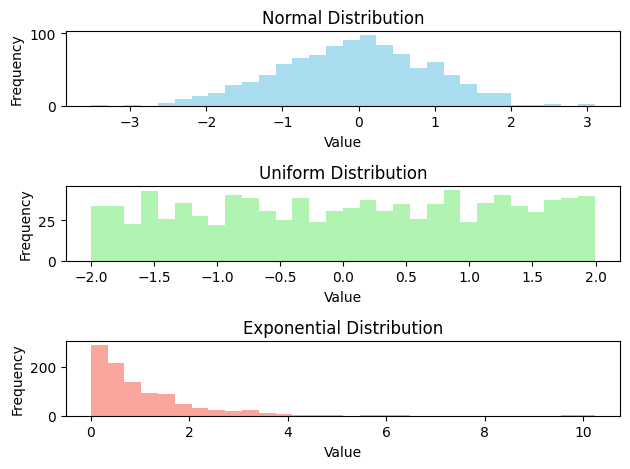

In [53]:
# Normal Distribution Plot
plt.subplot(3, 1, 1)
plt.hist(normal_data, bins=30, color='skyblue', alpha=0.7)
plt.title('Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Uniform Distribution Plot
plt.subplot(3, 1, 2)
plt.hist(uniform_data, bins=30, color='lightgreen', alpha=0.7)
plt.title('Uniform Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Exponential Distribution Plot
plt.subplot(3, 1, 3)
plt.hist(exponential_data, bins=30, color='salmon', alpha=0.7)
plt.title('Exponential Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [71]:
df[["age"]].mean()

age    29.699118
dtype: float64

In [72]:
df[["age"]].median()

age    28.0
dtype: float64

In [73]:
df[["age"]].mode()

,age
0,24.0


In [74]:
df[["age"]].mode()


,age
0,24.0


In [61]:
df_01.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Kurtosis


In [62]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt


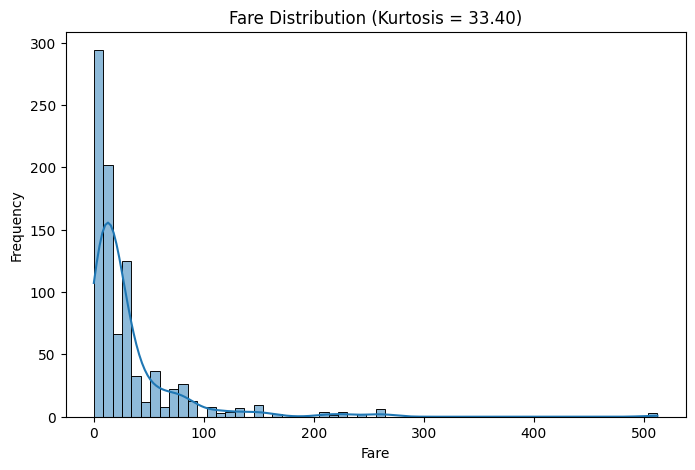

In [65]:
kurt_fare = df_01['fare'].kurtosis()

plt.figure(figsize=(8,5))
sns.histplot(df_01['fare'], kde=True,bins=60)
plt.title(f"Fare Distribution (Kurtosis = {kurt_fare:.2f})")
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.show()


📌 Shapiro–Wilk Test — Definition

Definition:
The Shapiro–Wilk test checks whether a numerical dataset is drawn from a normal (Gaussian) distribution.

Null Hypothesis (H₀): Data is normally distributed

Alternative Hypothesis (H₁): Data is NOT normally distributed

Decision Rule

If p-value > 0.05 → Fail to reject H₀ → Data is normal

If p-value ≤ 0.05 → Reject H₀ → Data is not normal

📌 Best for small to medium datasets (n < 5000)

In [66]:
import numpy as np
import pandas as pd
from scipy.stats import shapiro
import seaborn as sns
import matplotlib.pyplot as plt


In [67]:
# Generate sample data
np.random.seed(42)
data = np.random.normal(loc=0, scale=1, size=100)

# Shapiro-Wilk test
stat, p_value = shapiro(data)

print("Test Statistic:", stat)
print("P-value:", p_value)

if p_value > 0.05:
    print("Data is normally distributed")
else:
    print("Data is NOT normally distributed")


Test Statistic: 0.9898833815158516
P-value: 0.6551676754214818
Data is normally distributed


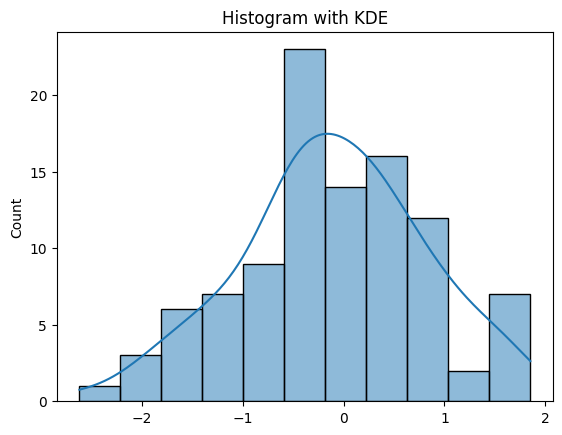

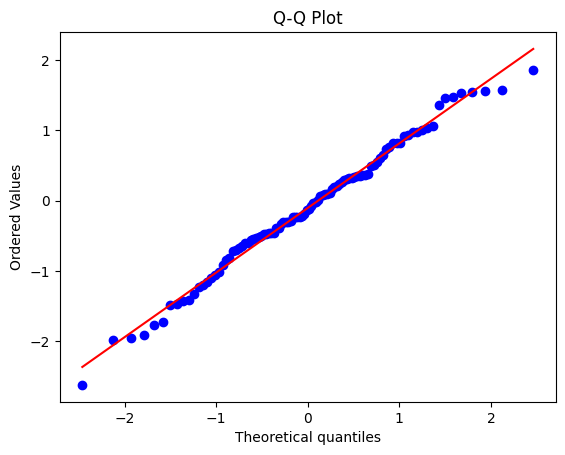

In [68]:
sns.histplot(data, kde=True)
plt.title("Histogram with KDE")
plt.show()

import scipy.stats as stats
stats.probplot(data, plot=plt)
plt.title("Q-Q Plot")
plt.show()


In [69]:
# Load dataset
df = sns.load_dataset("titanic")

# Drop missing values
age_data = df['age'].dropna()

# Shapiro-Wilk test
stat, p_value = shapiro(age_data)

print("Statistic:", stat)
print("P-value:", p_value)

if p_value > 0.05:
    print("Age is normally distributed")
else:
    print("Age is NOT normally distributed")


Statistic: 0.9814577414504954
P-value: 7.337348958673592e-08
Age is NOT normally distributed


Categorical Data

│
├── Nominal (No order)

│   ├── Gender
│   ├── Country
│   └── Color

│
└── Ordinal (Order matters)

    ├── Low < Medium < High
    ├── Education level
    └── Rating (1–5)




Categorical Encoding
│
├── Label Encoding (Ordinal only)
├── One-Hot Encoding (Nominal)
├── Target Encoding
└── Frequency Encoding


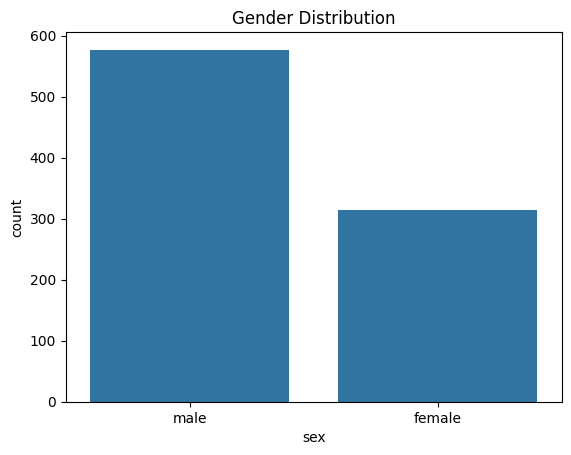

sex
male      64.758698
female    35.241302
Name: proportion, dtype: float64

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset("titanic")

# Count plot
sns.countplot(x='sex', data=df)
plt.title("Gender Distribution")
plt.show()

# Percentage
df['sex'].value_counts(normalize=True) * 100
